In [1]:
import rdkit.Chem.AllChem as Chem
import json
import pandas as pd
import numpy as np
from mgktools.interpret.interpret import interpret_training_mols, interpret_atoms

/home/xiangyan/apps/miniconda3/envs/mgktools/lib/python3.9/site-packages/graphdot/codegen/sympy_printer.py:4: SymPyDeprecationWarning: 

The sympy.printing.cxxcode submodule is deprecated. It has been renamed to
sympy.printing.cxx.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-printing-code-submodules
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  from sympy.printing.cxxcode import CXX11CodePrinter


In [2]:
from mgktools.hyperparameters import additive_msnorm
df = pd.read_csv('../datasets/freesolv.csv')
smiles_to_be_interpret = 'c1ccccc1CCO'
smiles_train = df.smiles
targets_train = df['freesolv']
n_mol = 10
alpha = 0.01
mgk_hyperparameters_file = additive_msnorm

# Interpretation as the sum of the contribution of the molecules in training set

In [3]:
y_pred, y_std, df_interpret= interpret_training_mols(
    smiles_to_be_interpret, 
    smiles_train, 
    targets_train, 
    alpha=alpha, 
    n_mol=10, 
    output_order='sort_by_value', 
    mgk_hyperparameters_file=mgk_hyperparameters_file,
    n_jobs=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 642 out of 642 | elapsed:   40.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [4]:
print('Prediction: %f +/- %f\n' % (y_pred, y_std * targets_train.std()))
print(df_interpret)

Prediction: -5.739816 +/- 1.856382

                            smiles_train  contribution_percentage  \
0                          c1ccc(cc1)CCO                 0.574527   
1                         c1ccc(cc1)CCCO                 0.077173   
2                           c1ccc(cc1)CO                 0.052879   
3  C1[C@H]([C@@H]([C@H]([C@H](O1)O)O)O)O                 0.003362   
4                         CCCc1ccc(cc1)O                 0.013028   
5                            CCOc1ccccc1                 0.028360   
6                          c1ccc(cc1)CBr                 0.024986   
7                          COc1cccc(c1)O                 0.007012   
8                          c1ccc(cc1)CCl                 0.025571   
9                         c1ccc(cc1)OC=O                 0.012794   

   contribution_value  
0           -3.901040  
1           -0.534035  
2           -0.350057  
3           -0.068984  
4           -0.067878  
5           -0.062960  
6           -0.059467  
7           

# Interpretation as the sum of the contribution of atoms

In [5]:
y_pred, y_std, mol = interpret_atoms(
    smiles_to_be_interpret, 
    smiles_train, 
    targets_train, 
    alpha=alpha, 
    mgk_hyperparameters_file=mgk_hyperparameters_file)

Prediction: -5.739841 +/- 1.856376



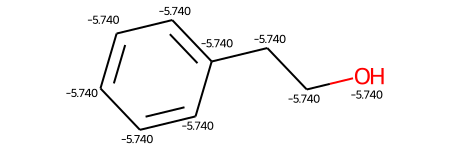

In [6]:
print('Prediction: %f +/- %f\n' % (y_pred, y_std * targets_train.std()))
mol